# Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/MachineLearningProject/svm_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(12)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Version,Label
0,0,4.3,967,2867.2,100000,0,0.0,0,0,4.4,1
1,0,4.4,167,5734.4,50000,0,0.0,0,0,2.3,0
2,0,4.1,36815,29696.0,1000000,0,0.0,0,0,4.2,1
3,0,4.4,13791,33792.0,1000000,0,0.0,0,0,3.0,1
4,0,4.4,13880,28672.0,1000000,0,0.0,0,0,4.1,1
5,0,4.4,8788,12288.0,1000000,0,0.0,0,0,4.0,1
6,0,4.2,44829,20480.0,10000000,0,0.0,2,0,4.1,1
7,0,4.6,4326,21504.0,100000,0,0.0,0,0,4.4,1
8,0,4.4,1518,37888.0,100000,0,0.0,0,0,2.3,1
9,0,4.7,3632,5632.0,500000,0,0.0,0,0,4.1,1


In [ ]:
#features and target variable
X = df.drop(columns=["Label"])
y = df["Label"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Confusion Matrix:
[[711   0]
 [  0 739]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       711
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1450
   macro avg       1.00      1.00      1.00      1450
weighted avg       1.00      1.00      1.00      1450



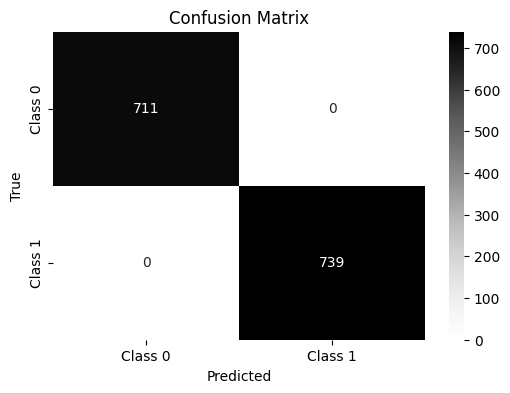

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


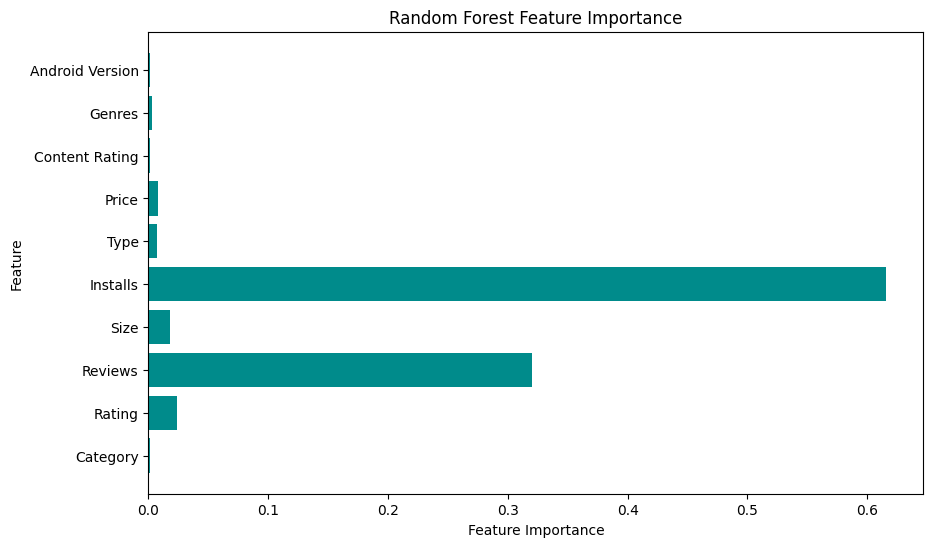

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, align='center', color = 'darkcyan')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
tree = model.estimators_[0]

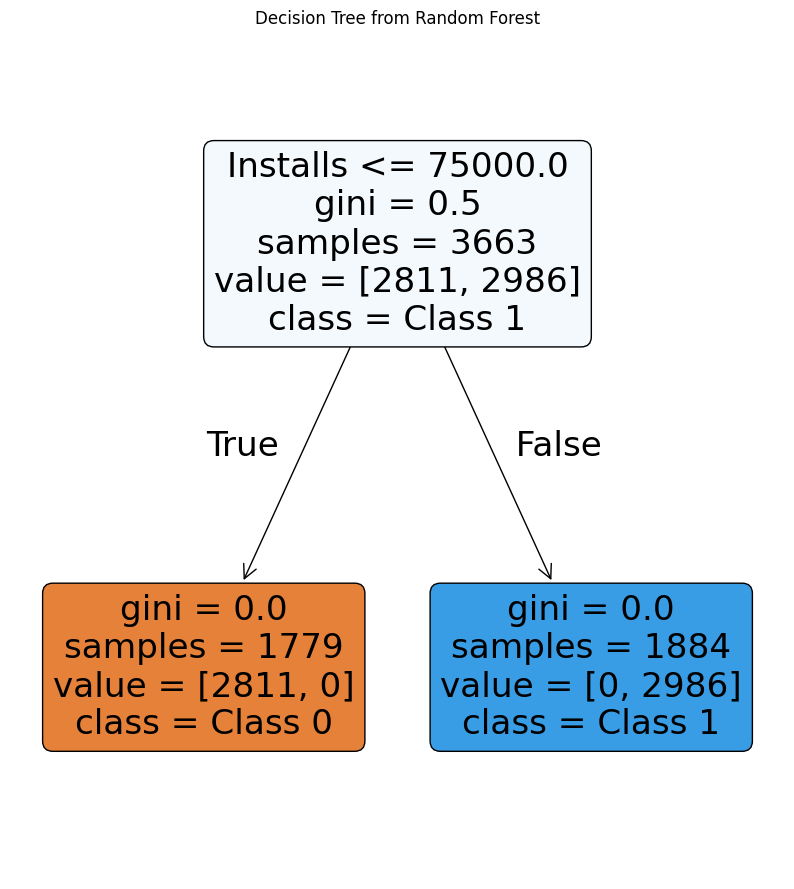

In [ ]:
plt.figure(figsize=(10, 11))
plot_tree(tree, feature_names=X.columns, class_names=["Class 0", "Class 1"], filled=True, rounded=True)
plt.title("Decision Tree from Random Forest")
plt.show()

## Boosting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

#fit the model on the training data
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = gb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1075
           1       1.00      1.00      1.00      1100

    accuracy                           1.00      2175
   macro avg       1.00      1.00      1.00      2175
weighted avg       1.00      1.00      1.00      2175



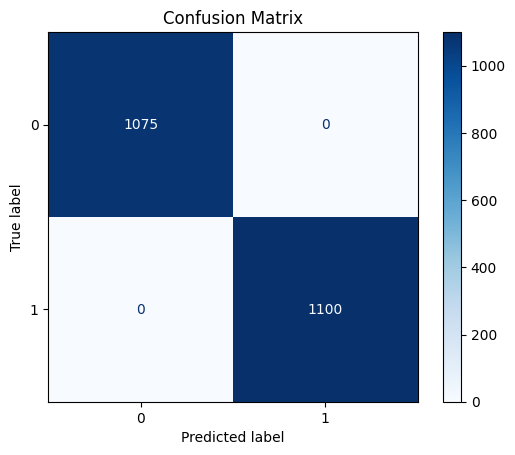

In [ ]:
ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

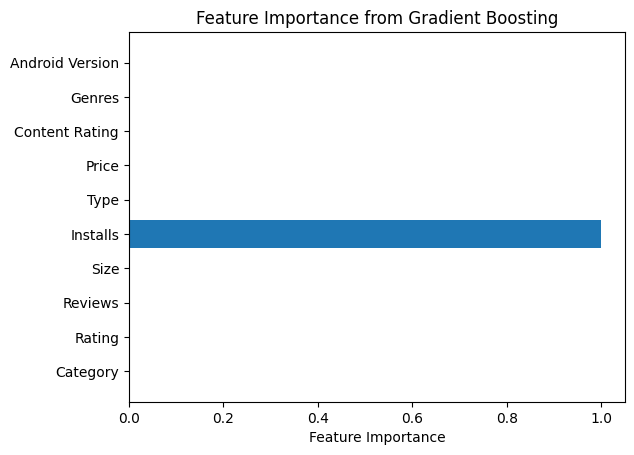

In [ ]:
feature_importances = gb_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Gradient Boosting")
plt.show()

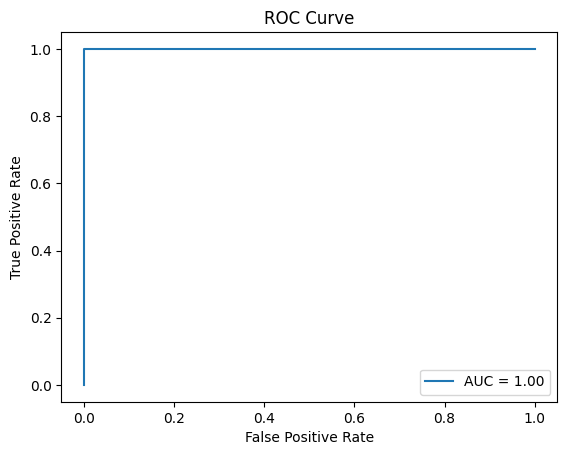

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()